In [1]:
# Write function linear_regression() to calculate c_0 and c_1 with input parameters are x and y, where both are list with the same length.

def linear_regression(x, y):
    n = len(x)
    x_mean = sum(x) / n
    y_mean = sum(y) / n
    ss_xy = sum(xi * yi for xi, yi in zip(x, y)) - n * x_mean * y_mean
    ss_xx = sum(xi**2 for xi in x) - n * x_mean**2
    c_1 = ss_xy / ss_xx
    c_0 = y_mean - c_1 * x_mean
    return c_0, c_1

In [3]:
# Write functions linear_interpol() to calculate linear interpolation with input parameters are x and y, where both are list with the same length.

def linear_interpol(x, y, x_interpol):
    n = len(x)
    for i in range(n-1):
        if x_interpol >= x[i] and x_interpol <= x[i+1]:
            # Hitung gradien
            m = (y[i+1] - y[i]) / (x[i+1] - x[i])

            # Hitung offset
            b = y[i] - m*x[i]

            # Hitung nilai y hasil interpolasi linear
            y_interpol = m*x_interpol + b

            return y_interpol

In [5]:
# Write functions lagrange_interpol() to calculate Lagrange polynomial interpolation with input parameters are x and y, where both are list with the same length.

def lagrange_interpol(x, y, z):
    n = len(x)
    p = 0
    for i in range(n):
        LI = 1
        for j in range(n):
            if i != j:
                LI *= (z - x[j])/(x[i] - x[j])
        p += y[i]*li
    return p

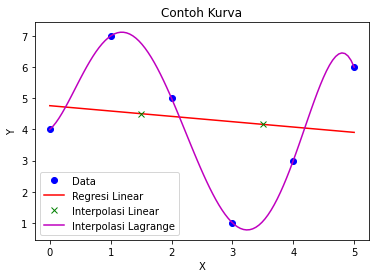

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi regresi linear
def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    sum_xy = np.sum(x * y)
    sum_xx = np.sum(x * x)

    # Mencari koefisien regresi
    c_1 = (sum_xy - n * x_mean * y_mean) / (sum_xx - n * x_mean * x_mean)
    c_0 = y_mean - c_1 * x_mean

    return c_0, c_1

# Fungsi interpolasi linear
def linear_interpol(x, y, x_interp):
    c_0, c_1 = linear_regression(x, y)
    y_interp = c_0 + c_1 * x_interp
    return y_interp

# Fungsi interpolasi polinomial Lagrange
def lagrange_interpol(x, y, x_interp):
    n = len(x)
    y_interp = np.zeros_like(x_interp)
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p *= (x_interp - x[j]) / (x[i] - x[j])
        y_interp += y[i] * p
    return y_interp

# Data
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([4, 7, 5, 1, 3, 6])

# Plot data
plt.plot(x, y, 'bo', label='Data')

# Plot regresi linear
c_0, c_1 = linear_regression(x, y)
x_reg = np.linspace(0, 5, 100)
y_reg = c_0 + c_1 * x_reg
plt.plot(x_reg, y_reg, 'r-', label='Regresi Linear')

# Plot interpolasi linear
x_interp = np.array([1.5, 3.5])
y_interp = linear_interpol(x, y, x_interp)
plt.plot(x_interp, y_interp, 'gx', label='Interpolasi Linear')

# Plot interpolasi Lagrange
x_interp = np.linspace(0, 5, 100)
y_interp = lagrange_interpol(x, y, x_interp)
plt.plot(x_interp, y_interp, 'm-', label='Interpolasi Lagrange')

# Label plot
plt.title('Contoh Kurva')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Tampilkan plot
plt.show()
